In [118]:
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src
%pip install --upgrade pip

  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 0f06c3f4c86d79e0fe1391e3f0aa81779bbd509f
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [119]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import qiskit
from qiskit.providers.fake_provider import FakeMontreal
from qiskit.providers.fake_provider import FakeMumbai
from qiskit.providers.fake_provider import FakeSydney

In [120]:
from qiskit_textbook.widgets import scalable_circuit

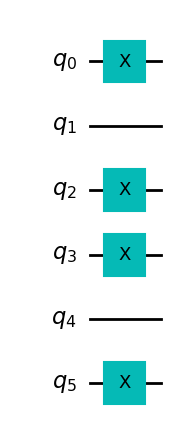

In [121]:
nqubits = 6
qc = QuantumCircuit(nqubits)
qc.x(0)
qc.x(2)
qc.x(3)
qc.x(5)
qc.draw("mpl")

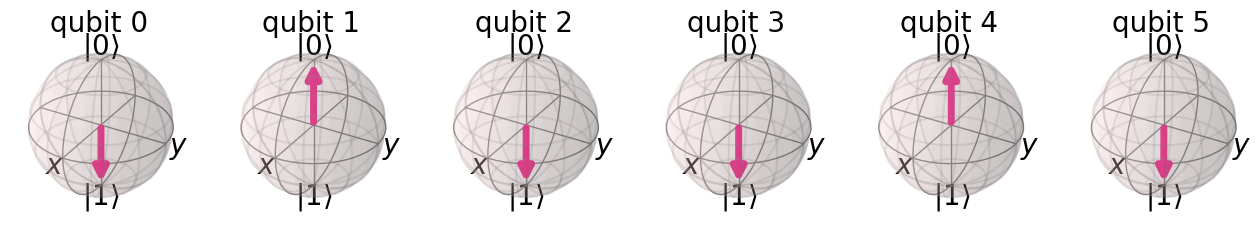

In [122]:
sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

In [123]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

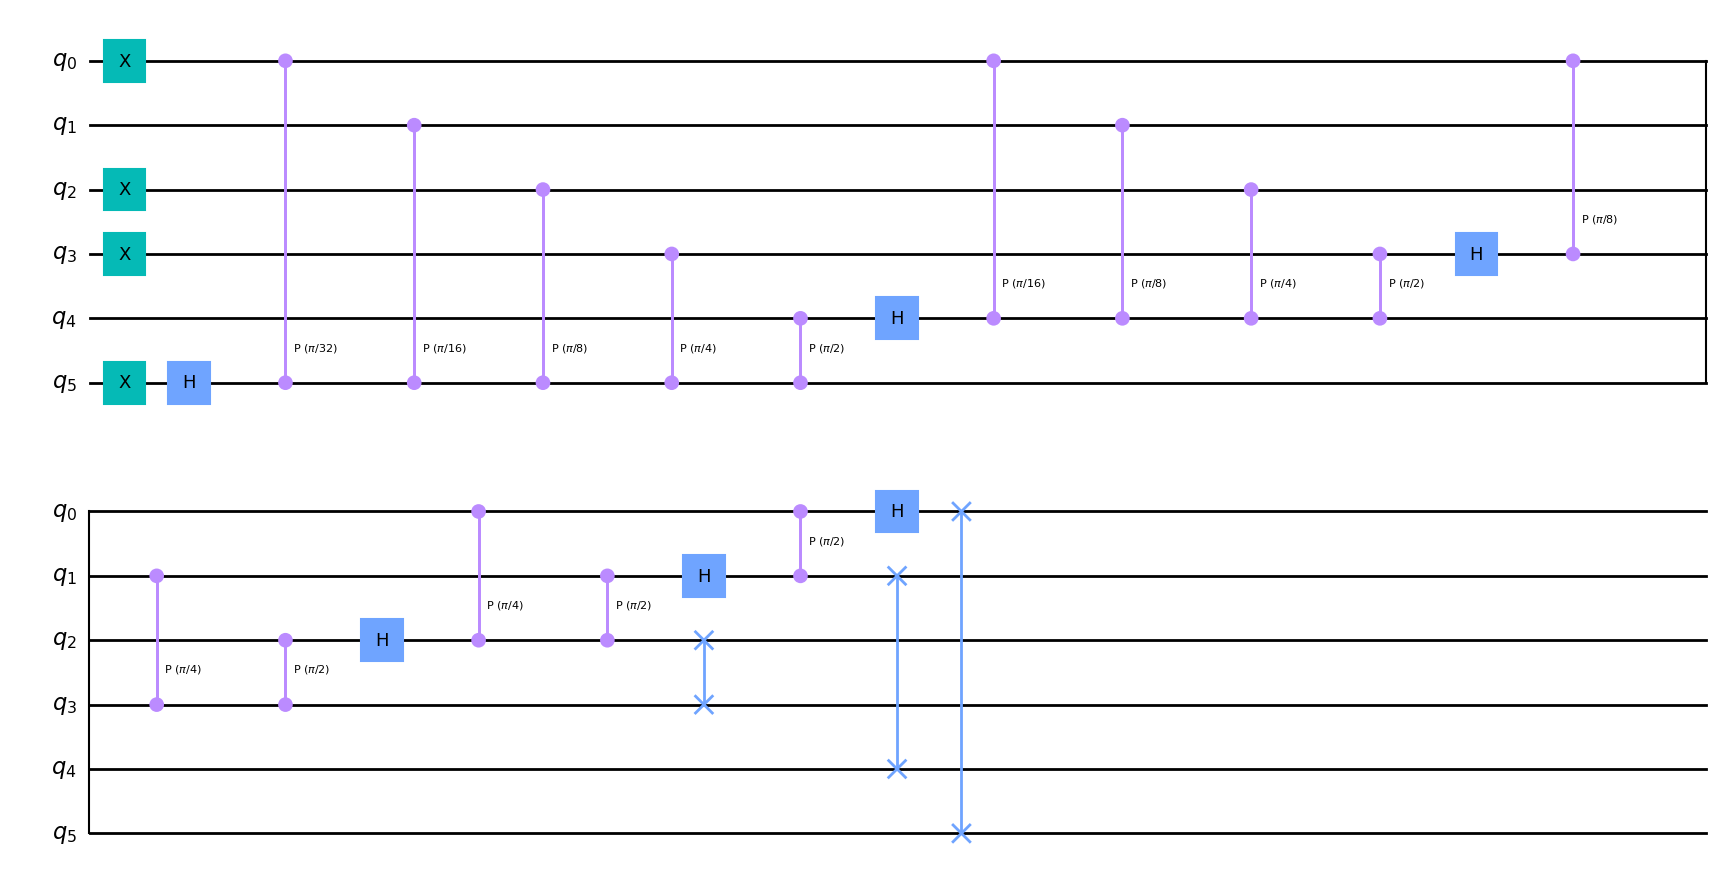

In [124]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

# Let's see how it looks:
qft(qc,nqubits)
qc.draw("mpl")

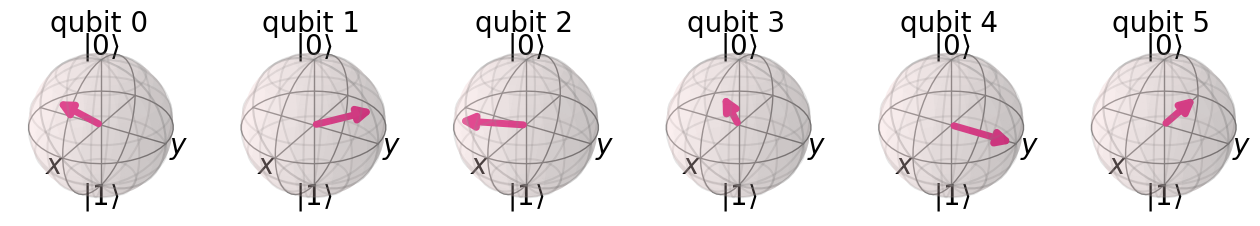

In [125]:
sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

In [126]:
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

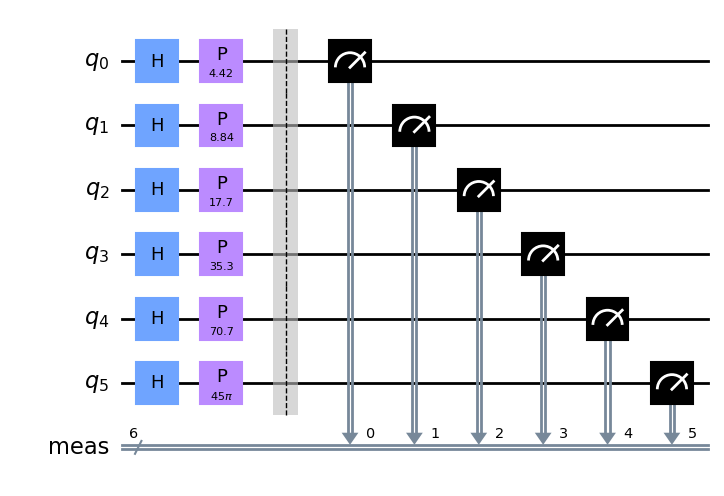

In [136]:
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(45*pi/32,0)
qc.p(45*pi/16,1)
qc.p(45*pi/8,2)
qc.p(45*pi/4,3)
qc.p(45*pi/2,4)
qc.p(45*pi,5)
qc.measure_all()
qc.draw("mpl")

In [137]:
backend = FakeMontreal()

In [138]:
shots = 2048
#transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(qc, shots=shots)
job_monitor(job)

Job Status: job has successfully run


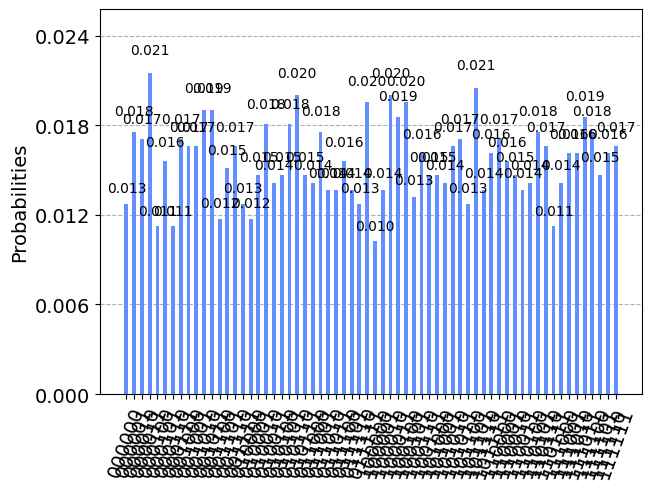

In [139]:
counts = job.result().get_counts()
plot_histogram(counts)

In [140]:
counts

{'010100': 30,
 '000110': 23,
 '101010': 34,
 '111000': 29,
 '010011': 29,
 '110000': 35,
 '110100': 29,
 '101001': 29,
 '011101': 28,
 '110001': 32,
 '000000': 26,
 '000101': 32,
 '101000': 30,
 '001100': 24,
 '000010': 35,
 '011111': 40,
 '101101': 42,
 '110011': 28,
 '111111': 34,
 '001111': 26,
 '110101': 36,
 '111110': 33,
 '100000': 21,
 '010000': 24,
 '100110': 33,
 '010101': 37,
 '101111': 33,
 '011100': 32,
 '011000': 29,
 '011011': 28,
 '001011': 39,
 '001001': 34,
 '100010': 41,
 '110110': 34,
 '000100': 23,
 '111100': 36,
 '111010': 33,
 '001000': 34,
 '101110': 28,
 '010010': 37,
 '101100': 26,
 '100111': 30,
 '111101': 30,
 '111011': 38,
 '100100': 40,
 '000011': 44,
 '100011': 38,
 '010111': 30,
 '010001': 30,
 '010110': 41,
 '001010': 39,
 '000111': 35,
 '011110': 26,
 '100001': 28,
 '111001': 33,
 '101011': 35,
 '110010': 30,
 '100101': 27,
 '000001': 36,
 '011010': 28,
 '011001': 36,
 '110111': 23,
 '001110': 34,
 '001101': 31}

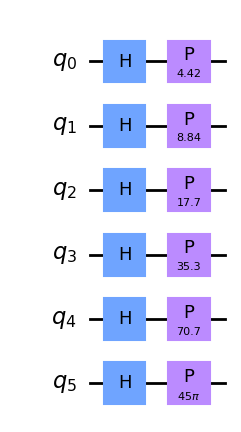

In [145]:
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(45*pi/32,0)
qc.p(45*pi/16,1)
qc.p(45*pi/8,2)
qc.p(45*pi/4,3)
qc.p(45*pi/2,4)
qc.p(45*pi,5)
qc.draw("mpl")

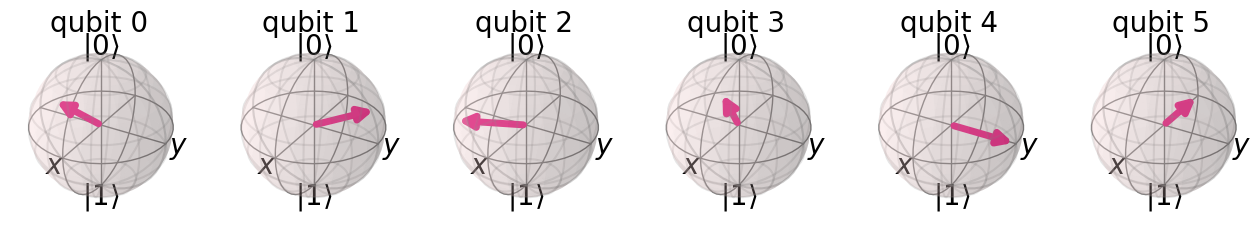

In [146]:
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

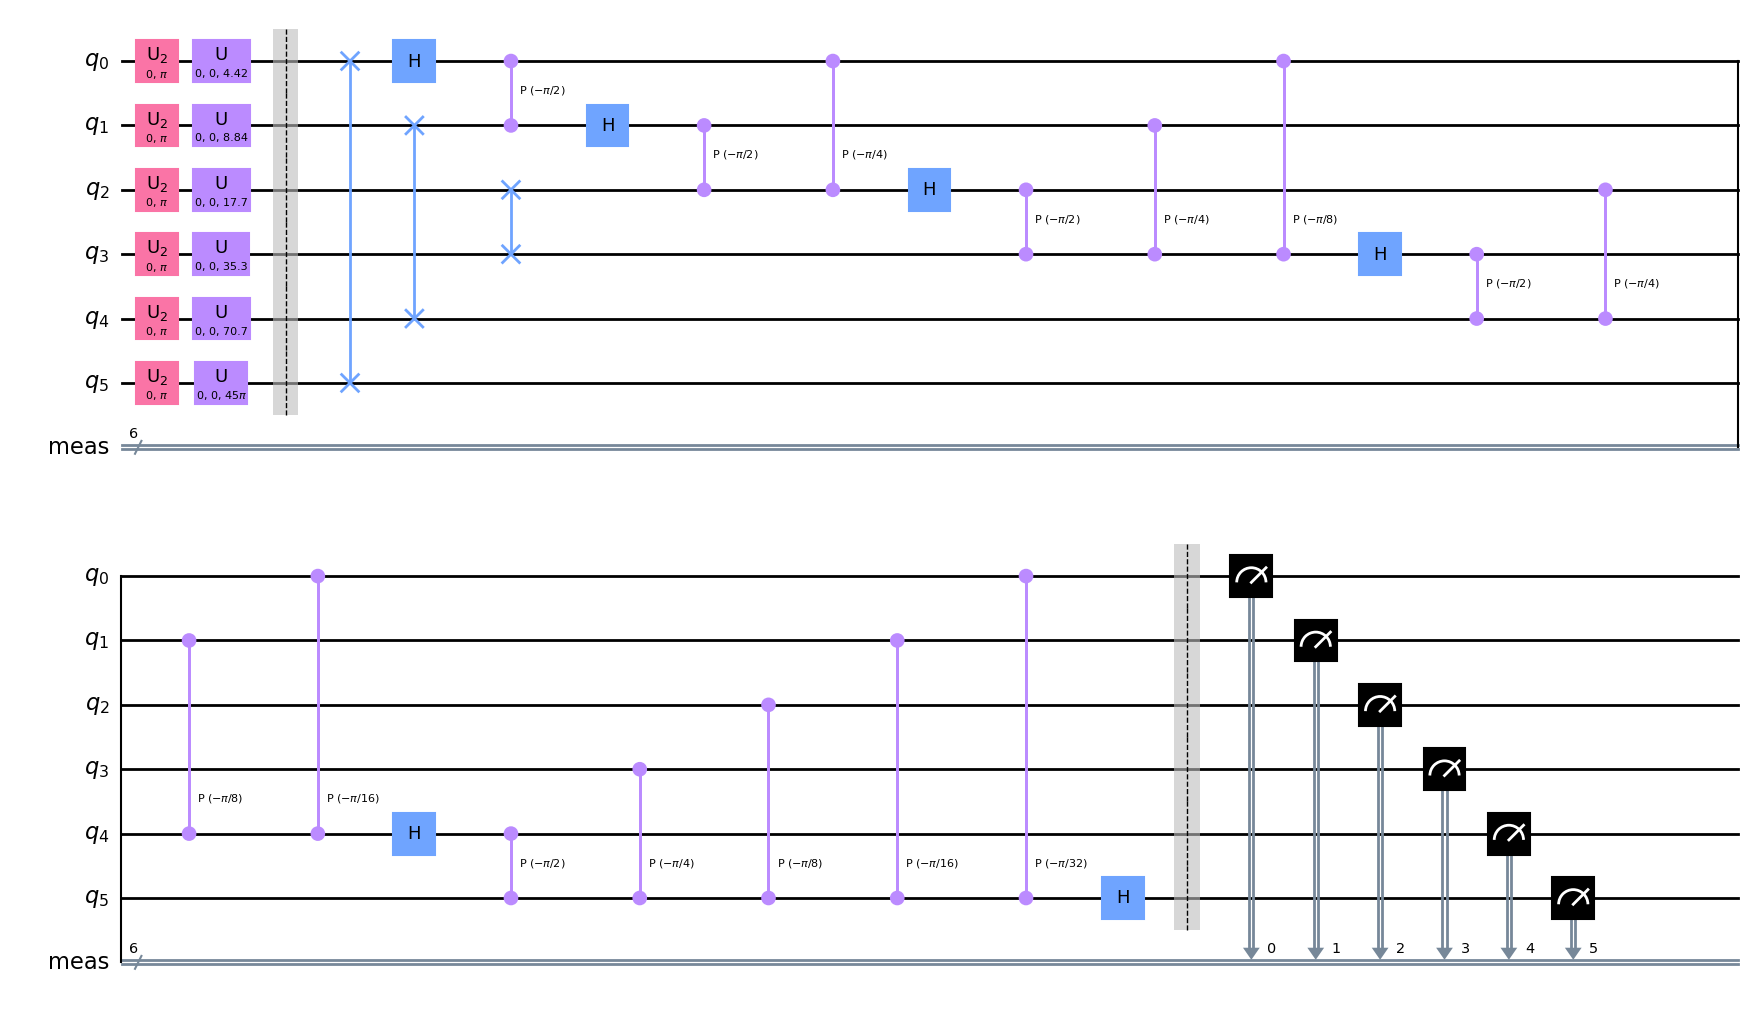

In [147]:
qc = inverse_qft(qc, nqubits)
qc.measure_all()
qc.draw("mpl")

In [148]:
backend = FakeMontreal()

In [149]:
shots = 2048
#transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(qc, shots=shots)
job_monitor(job)

Job Status: job has successfully run


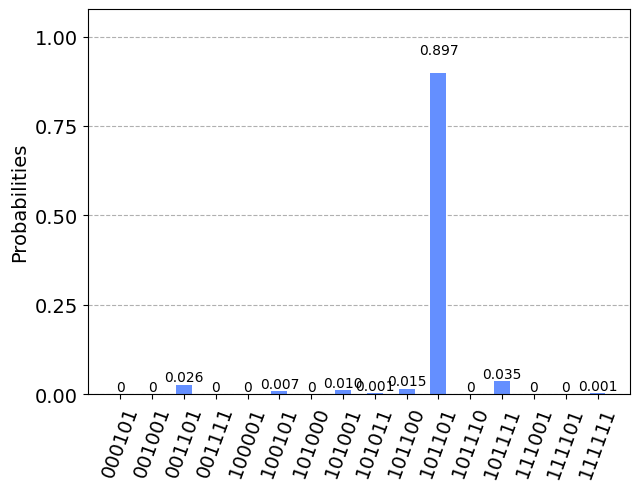

In [150]:
counts = job.result().get_counts()
plot_histogram(counts)

In [151]:
counts

{'101000': 2,
 '111001': 1,
 '101110': 2,
 '000101': 1,
 '100001': 2,
 '111101': 2,
 '111111': 3,
 '100101': 15,
 '001001': 1,
 '101101': 1838,
 '001101': 53,
 '001111': 1,
 '101011': 3,
 '101100': 31,
 '101111': 72,
 '101001': 21}